# Preparation

In [1]:
#!pip install --upgrade mplfinance
#!pip install --upgrade openpyxl
#!pip install tabulate

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import os
import pandas as pd
import matplotlib as mpl
import mplfinance as mpf
import openpyxl
import tabulate
from pathlib import Path
import numpy as np
from datetime import date

# Data Import

In [4]:
# Paths to files
all_coins_path = '../coin-prices/'
btc_path = '../coin-prices/btc/'
doge_path = '../coin-prices/doge/'
eth_path = '../coin-prices/eth/'

In [5]:
# File Names
all_coins_daily_2y_file = 'all_coins_daily_2y_2021-07-03.csv'
all_coins_daily_ytd_file = 'all_coins_daily_ytd_2021-07-03.csv'
all_coins_weekly_2y_file = 'all_coins_weekly_2y_2021-07-03.csv'
btc_daily_2y_file = 'btc_daily_2y_2021-07-03.csv'
btc_daily_ytd_file = 'btc_daily_ytd_2021-07-03.csv'
btc_weekly_2y_file = 'btc_weekly_2y_2021-07-03.csv'
btc_weekly_yrd_file = 'btc_weekly_ytd_2021-07-03.csv'
doge_daily_2y_file = 'doge_daily_2y_2021-07-03.csv'
doge_daily_ytd_file = 'doge_daily_ytd_2021-07-03.csv'
doge_weekly_2y_file = 'doge_weekly_2y_2021-07-03.csv'
doge_weekly_yrd_file = 'doge_weekly_ytd_2021-07-03.csv'
eth_daily_2y_file = 'eth_daily_2y_2021-07-03.csv'
eth_daily_ytd_file = 'eth_daily_ytd_2021-07-03.csv'
eth_weekly_2y_file = 'eth_weekly_2y_2021-07-03.csv'
eth_weekly_yrd_file = 'eth_weekly_ytd_2021-07-03.csv'

In [6]:
# Import Data as Prepared beforehand
btc_data = pd.read_csv(btc_path + btc_daily_2y_file, parse_dates = True, index_col = 0)
btc_data.index.name = 'Date'
doge_data = pd.read_csv(doge_path + doge_daily_2y_file, parse_dates = True, index_col = 0)
doge_data.index.name = 'Date'
eth_data = pd.read_csv(eth_path + eth_daily_2y_file, parse_dates = True, index_col = 0)
eth_data.index.name = 'Date'

In [7]:
SA_results_path = '../results/'
results_file_name = 'sample-data.xlsx'
#results = openpyxl.load_workbook(SA_results_path + results_file_name) 
#sheet = results.active
#print(sheet.max_row, sheet.max_column)

results = pd.read_excel(SA_results_path + results_file_name, header = 0, index_col = False, keep_default_na = True)
results.rename(columns = {'Author':'Podcast'}, inplace = True)
results.sort_values(by = "Date")
#display(results)

,Date,Podcast,Title,Coin,Sentiment
159,2021-05-15,AltcoinDaily,Title3,ETH,bearish
160,2021-05-15,AltcoinDaily,Title3,BTC,bullish
161,2021-05-15,AltcoinDaily,Title3,DOGE,bearish
162,2021-05-15,AltcoinDaily,Title3,DOGE,bearish
156,2021-05-15,AltcoinDaily,Title3,BTC,bearish
...,...,...,...,...,...
134,2021-06-28,AltcoinDaily,Title1,DOGE,bullish
135,2021-06-28,AltcoinDaily,Title1,BTC,bullish
136,2021-06-28,AltcoinDaily,Title1,ETH,bearish
14,2021-06-28,Web3,This Week in Blockchain 1,ETH,bullish


# Extracting Data

## by Coin

In [8]:
BTC_signals = results.query('Coin == "BTC"')
DOGE_signals = results.query('Coin == "DOGE"')
ETH_signals = results.query('Coin == "ETH"')
list_of_coins = ("BTC", "DOGE", "ETH")
# print(list_of_coins)
number_of_sentiments_per_coin = results.groupby('Coin').size()
#print(number_of_sentiments_per_coin)
### by Coin = BTC
btc_sentiments_total = BTC_signals['Sentiment'].value_counts(dropna=False)
#print(btc_sentiments_total)
### by Coin = DOGE
doge_sentiments_total = DOGE_signals['Sentiment'].value_counts(dropna=False)
#print(doge_sentiments_total)
### by Coin = ETH
eth_sentiments_total = ETH_signals['Sentiment'].value_counts(dropna=False)
#print(eth_sentiments_total)

## by Podcast

In [9]:
# get all unique Podcasts (Podcast Name not Podcast Title)
# make query subsets for each unique podcast
list_of_podcasts = results.Podcast.unique()
# print(list_of_podcasts)
grouped_by_podcasts = results.groupby('Podcast')
#grouped_by_podcasts.head()
number_of_sentiments_per_podcasts = results.groupby('Podcast').size()
#print(number_of_sentiments_per_podcasts)

## by Date

In [10]:
list_of_dates = results.Date.unique()
#print(list_of_dates)
grouped_by_date = results.groupby('Date')
#grouped_by_date.head()
number_of_sentiments_per_date = results.groupby('Date').size()
#print(number_of_date)
sentiments_per_date = grouped_by_date['Sentiment'].value_counts(dropna=False)
#print(sentiments_per_date)

## by Sentiment

In [11]:
list_of_sentiments = ("bullish", "neutral", "bearish")
# print(list_of_sentiments)
number_of_sentiments = results.groupby('Sentiment').size()
#print(number_of_sentiments)

## Combining Data Extracts: Coin per Date

In [12]:
btc_grouped_by_date = BTC_signals.groupby('Date')
#btc_grouped_by_date.head()

## Combining Data Extracts: Coin per Sentiment

In [13]:
### Sentiment == Bullish
btc_bullish = BTC_signals.query('Sentiment == "bullish"')
#print(btc_bullish)
doge_bullish = DOGE_signals.query('Sentiment == "bullish"')
#print(doge_bullish)
eth_bullish = ETH_signals.query('Sentiment == "bullish"')
#print(eth_bullish)

### Sentiment == Bearish
btc_bearish = BTC_signals.query('Sentiment == "bearish"')
#print(btc_bearish)
doge_bearish = DOGE_signals.query('Sentiment == "bearish"')
#print(doge_bearish)
eth_bearish = ETH_signals.query('Sentiment == "bearish"')
#print(eth_bearish)

### Sentiment == Neutral
btc_neutral = BTC_signals.query('Sentiment == "neutral"')
#print(btc_neutral)
doge_neutral = DOGE_signals.query('Sentiment == "neutral"')
#print(doge_neutral)
eth_neutral = ETH_signals.query('Sentiment == "neutral"')
#print(eth_neutral)

### Special Case: Sentiment == bearish && Sentiment == neutral
btc_bearishn = BTC_signals.query('Sentiment != "bullish"')
#print(btc_bearishn)
doge_bearishn = DOGE_signals.query('Sentiment != "bullish"')
#print(doge_bearishn)
eth_bearishn = ETH_signals.query('Sentiment != "bullish"')
#print(eth_bearishn)

## Combining Data Extracts: Coin per Sentiment per Date

In [14]:
### Sentiment == bullish
btc_bullish_by_date = btc_bullish.groupby('Date').size()
btc_bullish_by_date.name = "BTC_bull_freq"
#btc_bullish_by_date.head()
doge_bullish_by_date = doge_bullish.groupby('Date').size()
doge_bullish_by_date.name = "DOGE_bull_freq"
#doge_bullish_by_date.head()
eth_bullish_by_date = eth_bullish.groupby('Date').size()
eth_bullish_by_date.name = "ETH_bull_freq"
#eth_bullish_by_date.head()

### Sentiment == bearish
btc_bearish_by_date = btc_bearish.groupby('Date').size()
btc_bearish_by_date.name = "BTC_bear_freq"
#btc_bearish_by_date.head()
doge_bearish_by_date = doge_bearish.groupby('Date').size()
doge_bearish_by_date.name = "DOGE_bear_freq"
#doge_bearish_by_date.head()
eth_bearish_by_date = eth_bearish.groupby('Date').size()
eth_bearish_by_date.name = "ETH_bear_freq"
#eth_bearish_by_date.head()

#### Sentiment == bearish && neutral
btc_bearishn_by_date = btc_bearishn.groupby('Date').size()
btc_bearishn_by_date.name = "BTC_bearn_freq"
#btc_bearishn_by_date.head()
doge_bearishn_by_date = doge_bearishn.groupby('Date').size()
doge_bearishn_by_date.name = "DOGE_bearn_freq"
#doge_bearishn_by_date.head()
eth_bearishn_by_date = eth_bearishn.groupby('Date').size()
eth_bearishn_by_date.name = "ETH_bearn_freq"
#eth_bearishn_by_date.head()

#### Sentiment == neutral
btc_neutral_by_date = btc_neutral.groupby('Date').size()
btc_neutral_by_date.name = "BTC_neutral_freq"
#btc_neutral_by_date.head()
doge_neutral_by_date = doge_neutral.groupby('Date').size()
doge_neutral_by_date.name = "DOGE_neutral_freq"
#doge_neutral_by_date.head()
eth_neutral_by_date = eth_neutral.groupby('Date').size()
eth_neutral_by_date.name = "ETH_neutral_freq"
#eth_neutral_by_date.head()

## Combining Data Extracts: Aggregate Sentiments by Sentiment Type

In [15]:
### Bullish
bullish_sentiment_collector = pd.merge(btc_bullish_by_date.to_frame(), doge_bullish_by_date.to_frame(), on = "Date")
bullish_sentiment_collector = pd.merge(bullish_sentiment_collector, eth_bullish_by_date.to_frame(), on = "Date")
#print(bullish_sentiment_collector)

### Bearish
bearish_sentiment_collector = pd.merge(btc_bearish_by_date.to_frame(), doge_bearish_by_date.to_frame(), on = "Date")
bearish_sentiment_collector = pd.merge(bearish_sentiment_collector, eth_bearish_by_date.to_frame(), on = "Date")
#print(bearish_sentiment_collector)

### Neutral
neutral_sentiment_collector = pd.merge(btc_neutral_by_date.to_frame(), doge_neutral_by_date.to_frame(), on = "Date")
neutral_sentiment_collector = pd.merge(neutral_sentiment_collector, eth_neutral_by_date.to_frame(), on = "Date")
#print(neutral_sentiment_collector)

### Special Case: BearishN
bearishn_sentiment_collector = pd.merge(btc_bearishn_by_date.to_frame(), doge_bearishn_by_date.to_frame(), on = "Date")
bearishn_sentiment_collector = pd.merge(bearishn_sentiment_collector, eth_bearishn_by_date.to_frame(), on = "Date")
#print(bearishn_sentiment_collector)

## Combining Data Extracts: Aggregate Sentiments - All in One

In [16]:
all_sentiments_by_date = pd.merge(bullish_sentiment_collector, bearishn_sentiment_collector, on = "Date")
all_sentiments_by_date = pd.merge(all_sentiments_by_date, bearish_sentiment_collector, on = "Date")
#all_sentiments_by_date = pd.merge(all_sentiments_by_date, neutral_sentiment_collector, on = "Date")
display(all_sentiments_by_date)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq
Date,,,,,,,,,
2021-05-15,2,2,3,2,3,2,2,3,2
2021-05-31,6,2,4,1,3,2,1,3,2
2021-06-01,3,2,5,1,3,9,1,3,9
2021-06-14,7,7,7,4,4,5,4,4,5
2021-06-15,3,1,11,4,3,4,4,3,4
2021-06-21,3,4,1,1,1,2,1,1,2
2021-06-27,2,2,3,1,2,2,1,2,2
2021-06-28,6,5,6,3,3,6,3,3,6


## Calculate Sentiment per Coin per Day: Bull - BearN

In [17]:
## Find Stronger Sentiment: Bullish - BearishN

### BTC
btc_final_sentiment_by_date = all_sentiments_by_date['BTC_bull_freq'] - all_sentiments_by_date['BTC_bearn_freq']
btc_final_sentiment_by_date.name = 'BTC_final_sentiment'
#print(btc_final_sentiment_by_date)

### DOGE
doge_final_sentiment_by_date = all_sentiments_by_date['DOGE_bull_freq'] - all_sentiments_by_date['DOGE_bearn_freq']
doge_final_sentiment_by_date.name = 'DOGE_final_sentiment'
#print(doge_final_sentiment_by_date)

### ETH
eth_final_sentiment_by_date = all_sentiments_by_date['ETH_bull_freq'] - all_sentiments_by_date['ETH_bearn_freq']
eth_final_sentiment_by_date.name = 'ETH_final_sentiment'
#print(eth_final_sentiment_by_date)

## Prepare Comparison: Build Sentiment Database

### Approach 1: All in One

In [18]:
### BTC
all_sentiments_by_date = pd.merge(all_sentiments_by_date, btc_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

### DOGE
all_sentiments_by_date = pd.merge(all_sentiments_by_date, doge_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

### ETH
all_sentiments_by_date = pd.merge(all_sentiments_by_date, eth_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

display(all_sentiments_by_date)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,BTC_final_sentiment,DOGE_final_sentiment,ETH_final_sentiment
Date,,,,,,,,,,,,
2021-05-15,2,2,3,2,3,2,2,3,2,0,-1,1
2021-05-31,6,2,4,1,3,2,1,3,2,5,-1,2
2021-06-01,3,2,5,1,3,9,1,3,9,2,-1,-4
2021-06-14,7,7,7,4,4,5,4,4,5,3,3,2
2021-06-15,3,1,11,4,3,4,4,3,4,-1,-2,7
2021-06-21,3,4,1,1,1,2,1,1,2,2,3,-1
2021-06-27,2,2,3,1,2,2,1,2,2,1,0,1
2021-06-28,6,5,6,3,3,6,3,3,6,3,2,0


### Approach 2: Fresh, Dedicated Table

In [19]:
calc_final_sentiments_by_date = pd.merge(btc_final_sentiment_by_date.to_frame(), doge_final_sentiment_by_date.to_frame(), on = "Date")
calc_final_sentiments_by_date = pd.merge(calc_final_sentiments_by_date, eth_final_sentiment_by_date.to_frame(), on = "Date")

display(calc_final_sentiments_by_date)

,BTC_final_sentiment,DOGE_final_sentiment,ETH_final_sentiment
Date,,,
2021-05-15,0,-1,1
2021-05-31,5,-1,2
2021-06-01,2,-1,-4
2021-06-14,3,3,2
2021-06-15,-1,-2,7
2021-06-21,2,3,-1
2021-06-27,1,0,1
2021-06-28,3,2,0


# Comparison

## Bitcoin (BTC)

In [20]:
### BTC
comparison_table_bitcoin = pd.merge(btc_final_sentiment_by_date.to_frame(), btc_data, on = "Date")
comparison_table_bitcoin["EmpiricalPriceTrend"] = btc_data["Close"] - btc_data["Open"]
comparison_table_bitcoin["PredictedTrendbySA"] = np.where(comparison_table_bitcoin["BTC_final_sentiment"] > 0, "bullish", np.where(comparison_table_bitcoin["BTC_final_sentiment"] < 0, "bearish", "neutral"))
comparison_table_bitcoin["ObservedTrend"] = np.where(comparison_table_bitcoin["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_bitcoin["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_bitcoin["PredictionIsCorrect"] = np.where(comparison_table_bitcoin["PredictedTrendbySA"] == comparison_table_bitcoin["ObservedTrend"], True, False)
display(comparison_table_bitcoin)

,BTC_final_sentiment,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-05-15,0,49855.496094,50639.664062,46664.140625,46760.187500,59161047474,-3095.308594,neutral,bearish,False
2021-05-31,5,35658.593750,37468.250000,34241.945312,37332.855469,39009847639,1674.261719,bullish,bullish,True
2021-06-01,2,37293.792969,37896.734375,35787.085938,36684.925781,34639423297,-608.867188,bullish,bearish,False
2021-06-14,3,39016.968750,40978.363281,38757.285156,40218.476562,43148914673,1201.507812,bullish,bullish,True
2021-06-15,-1,40427.167969,41295.269531,39609.468750,40406.269531,46420149185,-20.898438,bearish,bearish,True
2021-06-21,2,35641.144531,35721.640625,31295.935547,31676.693359,52809038594,-3964.451172,bullish,bearish,False
2021-06-27,1,32287.523438,34656.128906,32071.757812,34649.644531,35511640894,2362.121094,bullish,bullish,True
2021-06-28,3,34679.121094,35219.890625,33902.074219,34434.335938,33892523752,-244.785156,bullish,bearish,False


In [21]:
comparison_table_bitcoin.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    4
True     4
dtype: int64

## Dogecoin (DOGE)

In [22]:
### DOGE
comparison_table_doge = pd.merge(doge_final_sentiment_by_date.to_frame(), doge_data, on = "Date")
comparison_table_doge["EmpiricalPriceTrend"] = doge_data["Close"] - doge_data["Open"]
comparison_table_doge["PredictedTrendbySA"] = np.where(comparison_table_doge["DOGE_final_sentiment"] > 0, "bullish", np.where(comparison_table_doge["DOGE_final_sentiment"] < 0, "bearish", "neutral"))
comparison_table_doge["ObservedTrend"] = np.where(comparison_table_doge["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_doge["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_doge["PredictionIsCorrect"] = np.where(comparison_table_doge["PredictedTrendbySA"] == comparison_table_doge["ObservedTrend"], True, False)
display(comparison_table_doge)

,DOGE_final_sentiment,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-05-15,-1,0.559668,0.562676,0.491299,0.507972,9836892944,-0.051696,bearish,bearish,True
2021-05-31,-1,0.301949,0.329163,0.294330,0.325810,2440829325,0.023861,bearish,bullish,False
2021-06-01,-1,0.325744,0.383079,0.312360,0.370077,5796031087,0.044333,bearish,bullish,False
2021-06-14,3,0.323903,0.336927,0.320087,0.332085,1613812023,0.008182,bullish,bullish,True
2021-06-15,-2,0.326785,0.330495,0.316976,0.328381,1687965230,0.001596,bearish,bullish,False
2021-06-21,3,0.280660,0.280889,0.166491,0.178691,5640232167,-0.101969,bullish,bearish,False
2021-06-27,0,0.246045,0.266891,0.240894,0.264450,2167521670,0.018405,neutral,bullish,False
2021-06-28,2,0.264918,0.266982,0.250762,0.256857,1932994784,-0.008061,bullish,bearish,False


In [23]:
comparison_table_doge.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    6
True     2
dtype: int64

## Ethereum (ETH)

In [24]:
### ETH
comparison_table_eth = pd.merge(eth_final_sentiment_by_date.to_frame(), eth_data, on = "Date")
comparison_table_eth["EmpiricalPriceTrend"] = eth_data["Close"] - eth_data["Open"]
comparison_table_eth["PredictedTrendbySA"] = np.where(comparison_table_eth["ETH_final_sentiment"] > 0, "bullish", np.where(comparison_table_eth["ETH_final_sentiment"] < 0, "bearish", "neutral"))
comparison_table_eth["ObservedTrend"] = np.where(comparison_table_eth["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_eth["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_eth["PredictionIsCorrect"] = np.where(comparison_table_eth["PredictedTrendbySA"] == comparison_table_eth["ObservedTrend"], True, False)
display(comparison_table_eth)

,ETH_final_sentiment,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-05-15,1,4075.951660,4129.185547,3638.122070,3638.122070,42422321751,-437.829590,bullish,bearish,False
2021-05-31,2,2387.198486,2715.854980,2279.505127,2714.945312,31007383150,327.746826,bullish,bullish,True
2021-06-01,-4,2707.560547,2739.737549,2531.160645,2633.518311,27363223090,-74.042236,bearish,bearish,True
2021-06-14,2,2508.770508,2606.432861,2469.388184,2537.891113,26964576331,29.120605,bullish,bullish,True
2021-06-15,7,2587.762695,2639.229248,2515.153076,2610.936768,29005279219,23.174072,bullish,bullish,True
2021-06-21,-1,2245.317871,2259.464111,1867.185425,1888.447510,33745173825,-356.870361,bearish,bearish,True
2021-06-27,1,1830.996948,1979.958130,1811.245850,1978.894653,19885474742,147.897705,bullish,bullish,True
2021-06-28,0,1981.386475,2139.805420,1963.615479,2079.657471,25514602841,98.270996,neutral,bullish,False


In [25]:
comparison_table_eth.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    2
True     6
dtype: int64

# Visualized

## Approach 1: Fake Predictor

### Bitcoin (BTC)

In [26]:
comparison_table_4_viz_btc = comparison_table_bitcoin
comparison_table_4_viz_btc["PredictedClose"] = np.where(comparison_table_4_viz_btc["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_btc["Open"] + 50, np.where(comparison_table_4_viz_btc["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_btc["Open"] - 50, comparison_table_4_viz_btc["Open"]))
display(comparison_table_4_viz_btc)

,BTC_final_sentiment,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-05-15,0,49855.496094,50639.664062,46664.140625,46760.187500,59161047474,-3095.308594,neutral,bearish,False,49855.496094
2021-05-31,5,35658.593750,37468.250000,34241.945312,37332.855469,39009847639,1674.261719,bullish,bullish,True,35708.593750
2021-06-01,2,37293.792969,37896.734375,35787.085938,36684.925781,34639423297,-608.867188,bullish,bearish,False,37343.792969
2021-06-14,3,39016.968750,40978.363281,38757.285156,40218.476562,43148914673,1201.507812,bullish,bullish,True,39066.968750
2021-06-15,-1,40427.167969,41295.269531,39609.468750,40406.269531,46420149185,-20.898438,bearish,bearish,True,40377.167969
2021-06-21,2,35641.144531,35721.640625,31295.935547,31676.693359,52809038594,-3964.451172,bullish,bearish,False,35691.144531
2021-06-27,1,32287.523438,34656.128906,32071.757812,34649.644531,35511640894,2362.121094,bullish,bullish,True,32337.523438
2021-06-28,3,34679.121094,35219.890625,33902.074219,34434.335938,33892523752,-244.785156,bullish,bearish,False,34729.121094


Text(0.5, 1.0, 'BTC (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

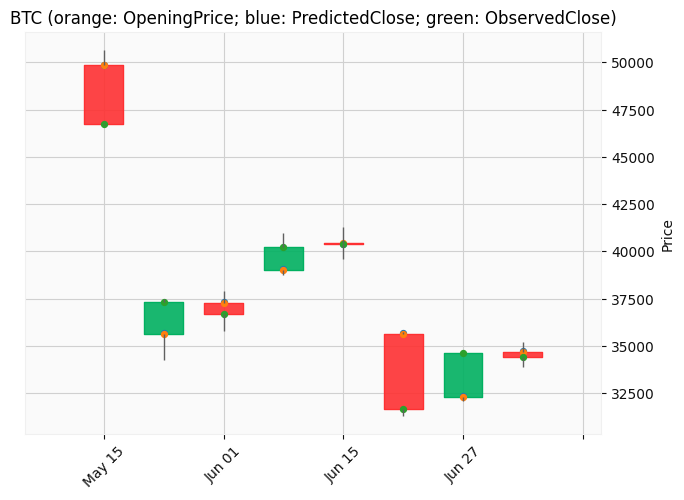

In [27]:
added_values_to_visualize = comparison_table_4_viz_btc[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'BTC (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_btc, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

### Dogecoin (DOGE)

In [28]:
comparison_table_4_viz_doge = comparison_table_doge
comparison_table_4_viz_doge["PredictedClose"] = np.where(comparison_table_4_viz_doge["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_doge["Open"] + 50, np.where(comparison_table_4_viz_doge["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_doge["Open"] - 50, comparison_table_4_viz_doge["Open"]))
display(comparison_table_4_viz_doge)

,DOGE_final_sentiment,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-05-15,-1,0.559668,0.562676,0.491299,0.507972,9836892944,-0.051696,bearish,bearish,True,-49.440332
2021-05-31,-1,0.301949,0.329163,0.294330,0.325810,2440829325,0.023861,bearish,bullish,False,-49.698051
2021-06-01,-1,0.325744,0.383079,0.312360,0.370077,5796031087,0.044333,bearish,bullish,False,-49.674256
2021-06-14,3,0.323903,0.336927,0.320087,0.332085,1613812023,0.008182,bullish,bullish,True,50.323903
2021-06-15,-2,0.326785,0.330495,0.316976,0.328381,1687965230,0.001596,bearish,bullish,False,-49.673215
2021-06-21,3,0.280660,0.280889,0.166491,0.178691,5640232167,-0.101969,bullish,bearish,False,50.280660
2021-06-27,0,0.246045,0.266891,0.240894,0.264450,2167521670,0.018405,neutral,bullish,False,0.246045
2021-06-28,2,0.264918,0.266982,0.250762,0.256857,1932994784,-0.008061,bullish,bearish,False,50.264918


Text(0.5, 1.0, 'DOGE (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

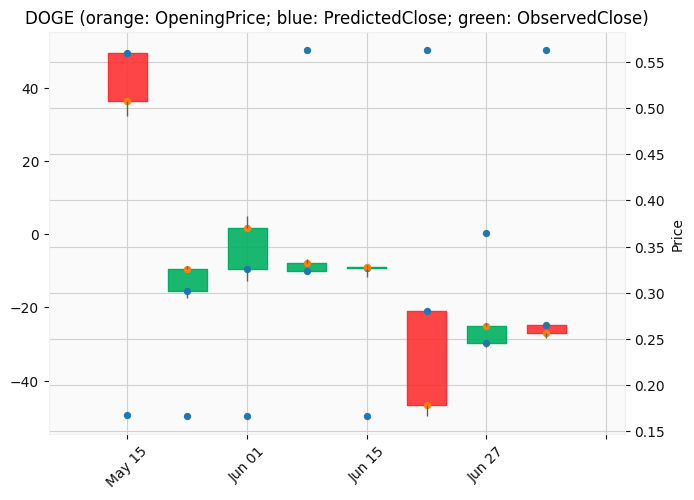

In [29]:
added_values_to_visualize = comparison_table_4_viz_doge[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'DOGE (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_doge, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

### Ethereum (ETH)

In [30]:
comparison_table_4_viz_eth = comparison_table_eth
comparison_table_4_viz_eth["PredictedClose"] = np.where(comparison_table_4_viz_eth["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_eth["Open"] + 50, np.where(comparison_table_4_viz_eth["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_eth["Open"] - 50, comparison_table_4_viz_eth["Open"]))
display(comparison_table_4_viz_eth)

,ETH_final_sentiment,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-05-15,1,4075.951660,4129.185547,3638.122070,3638.122070,42422321751,-437.829590,bullish,bearish,False,4125.951660
2021-05-31,2,2387.198486,2715.854980,2279.505127,2714.945312,31007383150,327.746826,bullish,bullish,True,2437.198486
2021-06-01,-4,2707.560547,2739.737549,2531.160645,2633.518311,27363223090,-74.042236,bearish,bearish,True,2657.560547
2021-06-14,2,2508.770508,2606.432861,2469.388184,2537.891113,26964576331,29.120605,bullish,bullish,True,2558.770508
2021-06-15,7,2587.762695,2639.229248,2515.153076,2610.936768,29005279219,23.174072,bullish,bullish,True,2637.762695
2021-06-21,-1,2245.317871,2259.464111,1867.185425,1888.447510,33745173825,-356.870361,bearish,bearish,True,2195.317871
2021-06-27,1,1830.996948,1979.958130,1811.245850,1978.894653,19885474742,147.897705,bullish,bullish,True,1880.996948
2021-06-28,0,1981.386475,2139.805420,1963.615479,2079.657471,25514602841,98.270996,neutral,bullish,False,1981.386475


Text(0.5, 1.0, 'ETH (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

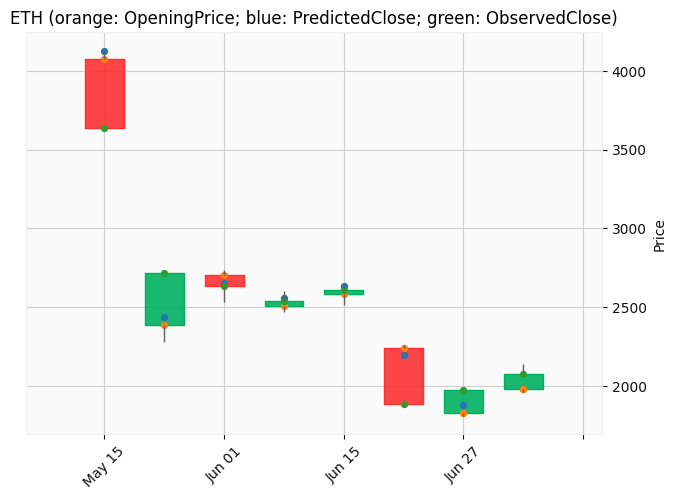

In [31]:
added_values_to_visualize = comparison_table_4_viz_eth[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'ETH (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_eth, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

## Approach 2: Actual Sentiment Strength

### Bitcoin (BTC)

Text(0.5, 1.0, 'BTC (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

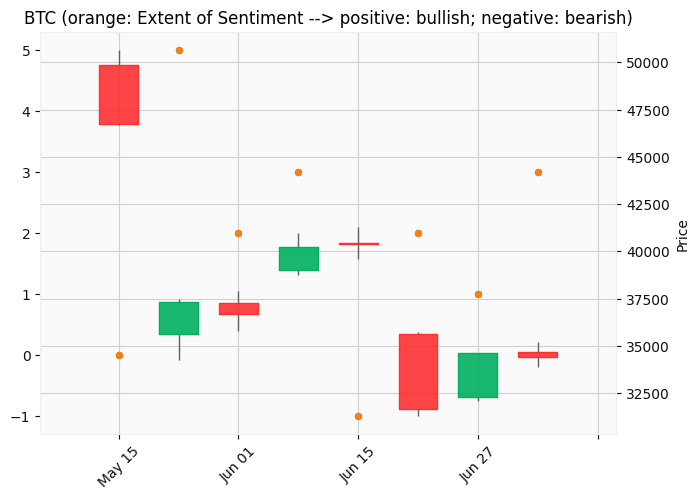

In [32]:
added_values_to_visualize = comparison_table_4_viz_btc[['BTC_final_sentiment']]
apds = [mpf.make_addplot(added_values_to_visualize, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_btc['BTC_final_sentiment'], type = 'scatter', secondary_y = 'auto')]
ticker = 'BTC (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_btc, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_' + today + '.png')

### Dogecoin (DOGE)

Text(0.5, 1.0, 'DOGE (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

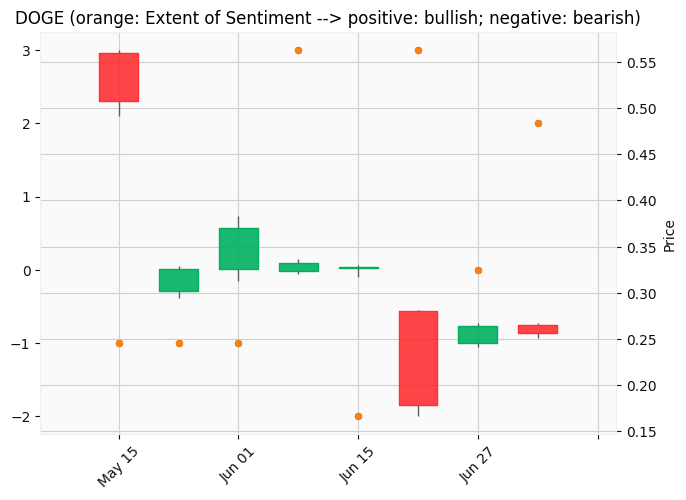

In [33]:
added_values_to_visualize = comparison_table_4_viz_doge[['DOGE_final_sentiment']]
apds = [mpf.make_addplot(added_values_to_visualize, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_doge['DOGE_final_sentiment'], type = 'scatter', secondary_y = 'auto')]
ticker = 'DOGE (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_doge, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_' + today + '.png')

### Ethereum (ETH)

Text(0.5, 1.0, 'ETH (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

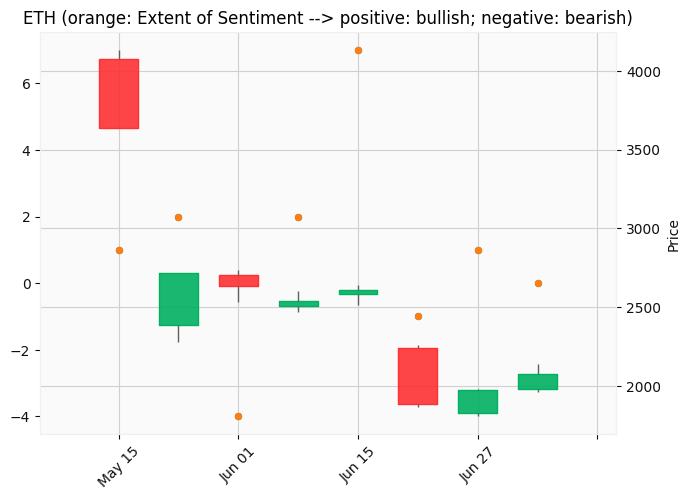

In [34]:
added_values_to_visualize = comparison_table_4_viz_eth[['ETH_final_sentiment']]
apds = [mpf.make_addplot(added_values_to_visualize, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_eth['ETH_final_sentiment'], type = 'scatter', secondary_y = 'auto')]
ticker = 'ETH (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_eth, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_' + today + '.png')